## Homework 06: Optimization in Python

## Due Date: March 29, 2023, 11:59pm

#### Firstname Lastname: 

#### E-mail: 

#### Enter your solutions and submit this notebook

---

**Problem 1 (30p)**

We examine a product of non-negative numbers given their sum. Concretely, the problem is to find all $(x, y, z)$ among all non-negative reals $x, y, z \geq 0$ such that
their product $P(x, y, z) = x y z$ is maximized, given their sum $x + y + z = 270$. 


1.1. (15p)
Cast the problem as a nonlinear two-dimensional optimization problem over with box constraints (*hint*: remove the sum constraint, and ignore one of the positivity constraints which should not be violated with proper initialization) and solve it using the L-BFGS-B method of `scipy.optimize.minimize`.



In [19]:
# Necessary imports
import numpy as np
import scipy.optimize as opt

# Define function
def cost_func_two_d(x):
    """
    Cost function that takes the problem input and transforms it to a two-dimensional constrained optimization problem
    """
    x,y = x
    z = 270 - (x + y)
    return (-1 *x*y*z)

# Set bounds for each variable
b = (0, 1000)
bounds = [b,b]

# Initlialize random guess
first_x = (10, 100)

# Use scipy optomize with bounds and L-BFGS-B method
x_opt = opt.minimize(cost_func_two_d, first_x, method = "L-BFGS-B", bounds=bounds)

# Display output
print(x_opt)

      fun: -728999.9999991449
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.01164154, 0.01164154])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 33
      nit: 9
     njev: 11
   status: 0
  success: True
        x: array([90.00005012, 90.00006221])


1.2. (15p)
Cast the problem as an equivalent one-dimensional constrained optimization problem (*hint*: after removing the sum constraint, can you further use optimality conditions to remove one more variable?), and solve it using `scipy.optimize.minimize_scalar`.



In [20]:
# Necessary imports
import numpy as np
import scipy.optimize as opt

# Define 1-d function
def cost_func_one_d(x):
    """
    Cost function that takes the problem input and transforms it to a one-dimensional constrained optimization problem
    """
    z = 270 - (x + x)
    return -1 * (x**2) * z

# Only one set of bounds necessary
bounds = (0, 1000)

# Per hint, use minimize scalar with "bounded" method
x_opt = opt.minimize_scalar(cost_func_one_d, method = "bounded", bounds=bounds)

# Print output
print(x_opt)

     fun: -729000.0
 message: 'Solution found.'
    nfev: 15
     nit: 15
  status: 0
 success: True
       x: 90.0000000190297


---

**Problem 2 (70p)**

Let us consider the following function,

$$h(x, y) := (x^2 + y - 10)^2 + (x + y^2 - 17)^2.$$
    
find **all extremal** points (both minima and maxima) in the region $-10 \leq x, y \leq 10$.


The goal is to: (a) find extremal points; (b) compare convergence, i.e. the numbers of: Iterations, Function evaluations, Gradient evaluations, Hessian evaluations.


Solve the problem by using the Newton optimization routine "scipy.optimize.fmin_ncg":

2.1. (20p) providing gradient (fprime) and Hessian (fhess) in "scipy.optimize.fmin_ncg"









# HELPER FUNCTIONS

In [65]:
#########################
# Define helper functions
#########################

# H as given in the problem statement, but minimization problem
def h_max(x):
    x,y = x
    return -((x**2 + y - 10)**2 + (x+ y**2 - 17)**2)

# Maximum function of function (Constained Maximization)
def h_max_gradient(x):
    x,y = x
    return np.array([-2*(x*(2*(x**2+y)-19)+y**2-17), -2*(x*(2*(y**2+x)-33)+x**2-10)])

#create fhess_max, which is the hessian of the function that we will minimize to find local maxima
def h_max_hessian(x):
    x,y = x
    return np.array([[-12*x**2-4*y+38,-4*(x+y)],
                     [-4*(x+y), -12*y**2-4*x+66]])


# Minimization function of function (Constained Minimization)
# Do the same but flip the sign

# Function value
def h_min(x):
    return h_max(x) * -1

# Gradients
def h_min_gradient(x):
    return h_max_gradient(x)* -1

# Hessian
def h_min_hessian(x):
    return h_max_hessian(x) * -1

# Helper function for problems 2.1/2.2/2.3 where
# We use scipy to optimize but give it different levels
# of information (gradient/hessian)
def solver(optimizer, min_start_pt, max_start_pt, grad=False, hessian=False):
    
    print(f'Running h with min starting point {min_start_pt}, Grad={grad}, Hessian={hessian}')
    #Different paths of execution depending on how much help we give the optimizer
    
    # Using the hessian and gradient
    if hessian and grad:
        min_pt, min_val,*_ = optimizer(h_min, min_start_pt, fprime=h_min_gradient, fhess=h_min_hessian, full_output=1,disp=1)
        max_pt, max_val,*_ = optimizer(h_max, max_start_pt, fprime=h_max_gradient, fhess=h_max_hessian, full_output=1,disp=1)
        
    # Just using gradient
    elif grad and not hessian:
        min_pt, min_val,*_ = optimizer(h_min, min_start_pt, fprime=h_min_gradient, full_output=1,disp=1)
        max_pt, max_val,*_ = optimizer(h_max, max_start_pt, fprime=h_max_gradient, full_output=1,disp=1)
    # Not using either
    else:
        min_pt, min_val,*_ = optimizer(h_min, min_start_pt, full_output=1,disp=1)
        max_pt, max_val,*_ = optimizer(h_max, max_start_pt, full_output=1,disp=1)
        
        
    # Output results
    print(f'Optimization Ended: Optimal point: {min_pt} with h(x*, y*)={min_val}')
    print(f'Running h with max starting point {max_start_pt}, Grad={grad}, Hessian={hessian}')
    print(f'Optimization Ended: Optimal point: {max_pt} with h(x*, y*)={max_val}')

# Implementing hints

In [66]:
# Initialize storage
starting_points_mins = []
starting_points_maxs = []

# Define starting points
starting_points = np.linspace((-10,-10),(10,10),10)

# Hint 2 utilizing Brute-force for initial point selection

In [67]:
# Iterate using brute force to find suitable starting points
for point1 in starting_points:
    for point2 in starting_points:
        point = (point1, point2)
        starting_points_mins.append(opt.brute(h_min, point))
        starting_points_maxs.append(opt.brute(h_max, point))

In [69]:
# Start solving problem 2.1
optimizer = opt.fmin_ncg
# Iterate over the starting points we generated
for min_start_pt, max_start_pt in zip(starting_points_mins, starting_points_maxs):
  # Run helper function with desired settings (see above markdown cell HELPER FUNCTIONS)
  solver(optimizer, min_start_pt, max_start_pt, grad=True, hessian=True)

Running h with min starting point [-3.81611024 -4.56248294], Grad=True, Hessian=True
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 26
         Gradient evaluations: 14
         Hessian evaluations: 1
Optimization terminated successfully.
         Current function value: -135794396432293471500357100627443728194601284712895847845400328839573178680410484867760308164279538176281841023319882415229353125464943311695635955225793052669205776659539860389888.000000
         Iterations: 1
         Function evaluations: 1
         Gradient evaluations: 1
         Hessian evaluations: 1
Optimization Ended: Optimal point: [-3.81611024 -4.56248294] with h(x*, y*)=6.567844730996675e-08
Running h with max starting point [-6.06862353e+44 -1.12961760e+44], Grad=True, Hessian=True
Optimization Ended: Optimal point: [-6.06862353e+44 -1.12961760e+44] with h(x*, y*)=-1.3579439643229347e+179
Running h with min starting point [-3.81606168 -4.56244688], Grad=Tru

2.2. (20p) providing only gradient (fprime) in "scipy.optimize.fmin_ncg"

Solve the problem by using the quasi-Newton optimization routine "fmin_bfgs":

In [70]:
# Start solving problem 2.2

optimizer = opt.fmin_ncg
# Iterate over the starting points we generated
for min_start_pt, max_start_pt in zip(starting_points_mins, starting_points_maxs):
  # Run helper function with desired settings (see above markdown cell HELPER FUNCTIONS)
  solver(optimizer, min_start_pt, max_start_pt, grad=True, hessian=False)

Running h with min starting point [-3.81611024 -4.56248294], Grad=True, Hessian=False
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 26
         Gradient evaluations: 15
         Hessian evaluations: 0
Optimization terminated successfully.
         Current function value: -135794396432293471500357100627443728194601284712895847845400328839573178680410484867760308164279538176281841023319882415229353125464943311695635955225793052669205776659539860389888.000000
         Iterations: 1
         Function evaluations: 2
         Gradient evaluations: 3
         Hessian evaluations: 0
Optimization Ended: Optimal point: [-3.81611024 -4.56248294] with h(x*, y*)=6.567844730996675e-08
Running h with max starting point [-6.06862353e+44 -1.12961760e+44], Grad=True, Hessian=False
Optimization Ended: Optimal point: [-6.06862353e+44 -1.12961760e+44] with h(x*, y*)=-1.3579439643229347e+179
Running h with min starting point [-3.81606168 -4.56244688], Grad=T

/var/folders/rk/rwsr6gss0vz3g4fz3_kt0x0m0000gn/T/ipykernel_1771/358325871.py:13: RuntimeWarning: overflow encountered in double_scalars
  return np.array([-2*(x*(2*(x**2+y)-19)+y**2-17), -2*(x*(2*(y**2+x)-33)+x**2-10)])
/var/folders/rk/rwsr6gss0vz3g4fz3_kt0x0m0000gn/T/ipykernel_1771/358325871.py:13: RuntimeWarning: overflow encountered in double_scalars
  return np.array([-2*(x*(2*(x**2+y)-19)+y**2-17), -2*(x*(2*(y**2+x)-33)+x**2-10)])
/var/folders/rk/rwsr6gss0vz3g4fz3_kt0x0m0000gn/T/ipykernel_1771/358325871.py:13: RuntimeWarning: overflow encountered in double_scalars
  return np.array([-2*(x*(2*(x**2+y)-19)+y**2-17), -2*(x*(2*(y**2+x)-33)+x**2-10)])
/var/folders/rk/rwsr6gss0vz3g4fz3_kt0x0m0000gn/T/ipykernel_1771/358325871.py:13: RuntimeWarning: overflow encountered in double_scalars
  return np.array([-2*(x*(2*(x**2+y)-19)+y**2-17), -2*(x*(2*(y**2+x)-33)+x**2-10)])
/var/folders/rk/rwsr6gss0vz3g4fz3_kt0x0m0000gn/T/ipykernel_1771/358325871.py:13: RuntimeWarning: overflow encountered in

2.3. (20p) **not** providing gradient (fprime) or Hessian (like in "scipy.optimize.fmin_ncg").


Use JAX for computing the gradient and Hessian as in the lecture. (make sure the gradient and Hessian are correctly computed).

In [71]:
# Start solving problem 2.1
optimizer = opt.fmin_bfgs
# Iterate over the starting points we generated
for min_start_pt, max_start_pt in zip(starting_points_mins, starting_points_maxs):
  # Run helper function with desired settings (see above markdown cell HELPER FUNCTIONS)
  solver(optimizer, min_start_pt, max_start_pt, grad=False, hessian=False)

Running h with min starting point [-3.81611024 -4.56248294], Grad=False, Hessian=False
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 15
         Gradient evaluations: 5
         Current function value: -135794396432293471500357100627443728194601284712895847845400328839573178680410484867760308164279538176281841023319882415229353125464943311695635955225793052669205776659539860389888.000000
         Iterations: 0
         Function evaluations: 3
         Gradient evaluations: 1
Optimization Ended: Optimal point: [-3.8160797  -4.56246422] with h(x*, y*)=9.268269897429204e-15
Running h with max starting point [-6.06862353e+44 -1.12961760e+44], Grad=False, Hessian=False
Optimization Ended: Optimal point: [-6.06862353e+44 -1.12961760e+44] with h(x*, y*)=-1.3579439643229347e+179
Running h with min starting point [-3.81606168 -4.56244688], Grad=False, Hessian=False
Optimization terminated successfully.
     

2.4. (10p) Plot $h(x, y)$ in the given region $-10 \leq x, y \leq 10$.


**Hint**: Note there are multiple extremal points in the given region. So one has to run the Newton routine with different starting points in order to find different extremal points. 


For every extremal point report: 
- (xopt, yopt)
- h(xopt, yopt)
- (xstart, ystart)
- the number of Iterations
- the number of Function evaluations
- the number of Gradient evaluations
- the number of Hessian evaluations.

**Hint 2:** There are both local mimima and maxima; notice that "scipy.optimize.fmin_ncg" finds "minimum" not the "maximum". To locate stationary points, partition $-10 \leq x, y \leq 10$ into multiple regions and use "optimize.brute" in each of these regions. Then use the resulting points as starting points in "scipy.optimize.fmin_ncg".

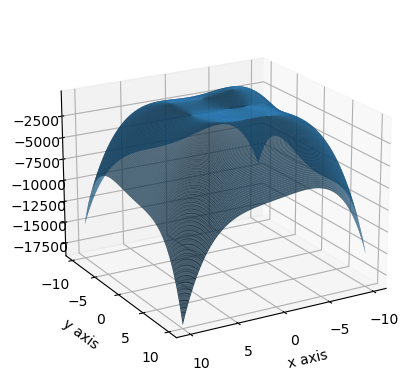

In [79]:
# Necessary imports for graphing
import matplotlib.pyplot as plt

# Initialize helper variables
x = np.linspace(-10, 10, 300)
x_grid, y_grid = np.meshgrid(x, x)

# Calculate h(x,y) values using h_max
h_of_x_y_vals = h_max((x_grid, y_grid))

# Initialize figure object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set labels / axis
plt.xlabel('x axis')
plt.ylabel('y axis')

# Plot visual
ax.plot_surface(x_grid, y_grid, h_of_x_y_vals, cstride=1, rstride=1,)
ax.view_init(20, 60)
plt.show()